In [1]:
import pandas as pd
import pickle
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pickle.load( open( "../data/Voc_strat_text.pickle", "rb" ) )

In [3]:
nmf_df = pd.read_csv('../data/NMF_topic_n.csv')

### Functions

In [4]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

### Hierarchical Clustering

#### Dendogram

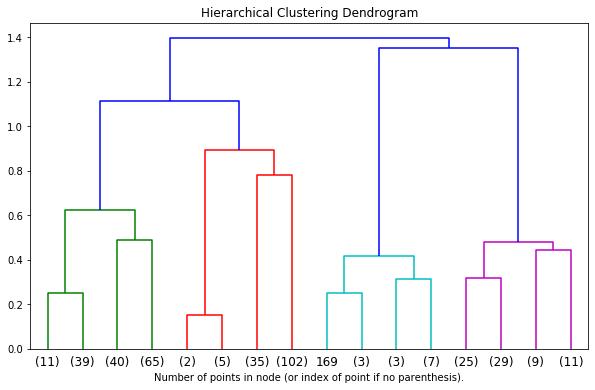

In [7]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(nmf_df[nmf_df.columns[1:]])
plt.figure(figsize=(10,6))
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [8]:
topics = list(nmf_df.columns[1:5])
n_clusters = 4
clusters = ['Cluster {}'.format(i+1) for i in range(n_clusters)]
ward = AgglomerativeClustering(n_clusters=n_clusters).fit(nmf_df[topics])
dict_cl = {0:'Cluster 2', 1:'Cluster 1', 2:'Cluster 3', 3:'Cluster 4'}
nmf_df['labels'] = [dict_cl[l] for l in ward.labels_]

In [9]:
nmf_df

,Index_survey,EL_CON,SIM_ID,DICC,CON_AM,labels
0,0,0.056030,0.161122,0.000000,0.000000,Cluster 1
1,1,0.068552,0.025795,0.000000,0.003243,Cluster 2
2,2,0.020734,0.094008,0.000000,0.054272,Cluster 1
3,3,0.078123,0.000000,0.000000,0.079309,Cluster 4
4,4,0.000000,0.159151,0.000000,0.000000,Cluster 1
...,...,...,...,...,...,...
382,396,0.068610,0.094619,0.000000,0.015865,Cluster 1
383,397,0.003780,0.049601,0.103745,0.000000,Cluster 2
384,398,0.017594,0.102895,0.000000,0.096950,Cluster 1
385,399,0.117892,0.022495,0.000000,0.000000,Cluster 2


In [11]:
#nmf_df.to_csv('../data/NMF_topic_l.csv',index=False)

In [12]:
res = pd.DataFrame(columns=topics+['n'], index = clusters+['Total'])
for i, cl in enumerate(clusters):
    res.loc[cl] = np.round(nmf_df.loc[nmf_df.labels==cl, topics].sum() *100 / nmf_df.loc[nmf_df.labels==cl, topics].sum().sum(),2)
    res.loc[cl,'n'] = nmf_df.loc[nmf_df.labels==cl].shape[0]

In [13]:
res.loc['Total'] = np.round(nmf_df.loc[:, topics].sum() *100 / nmf_df.loc[:, topics].sum().sum(),2)
res.loc['Total','n'] = res.n.sum()

In [14]:
res

,EL_CON,SIM_ID,DICC,CON_AM,n
Cluster 1,14.76,69.93,0.47,14.85,155
Cluster 2,45.72,20.35,18.55,15.38,144
Cluster 3,19.04,1.01,76.24,3.72,14
Cluster 4,17.91,3.99,8.91,69.19,74
Total,25.29,34.03,13.97,26.71,387
